# Advanced quantitative techniques - Class 11 - Difference-in-differences

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
# side 28
eitc = pd.read_stata('Data/eitc.dta')
eitc.columns

Index(['state', 'year', 'urate', 'children', 'nonwhite', 'finc', 'earn', 'age',
       'ed', 'work', 'unearn'],
      dtype='object')

In [3]:
np.mean(eitc[eitc['children'] == 0]['work'])

0.5744896237556942

In [6]:
np.mean(eitc[eitc['children'] == 1]['work'])

0.5376062786134729

In [7]:
np.mean(eitc[eitc['children'] >= 1]['work'])

0.4664279319606088

In [4]:
# slide 30
eitc['c_earn'] = eitc['earn'] * eitc['work']
eitc['c_earn'] = eitc['c_earn'].replace(0, np.nan)

eitc['post93'] = (eitc['year'] >= 1994).astype(int) 
eitc['anykids'] = (eitc['children'] > 0).astype(int)

# Take average value of 'work' by year, conditional on anykids
minfo = eitc.groupby(['year', 'anykids'], as_index = False).agg({'work': 'mean'})

In [5]:
# Rename columns
minfo.columns = ['YR', 'Treatment', 'LFPR']

# Add new column with labels
minfo['Group'] = np.where(minfo['Treatment'] == 0, 'Single women, no children', 'Single women, children')

minfo

,YR,Treatment,LFPR,Group
0,1991.0,0,0.583032,"Single women, no children"
1,1991.0,1,0.460053,"Single women, children"
2,1992.0,0,0.571566,"Single women, no children"
3,1992.0,1,0.438920,"Single women, children"
4,1993.0,0,0.571144,"Single women, no children"
5,1993.0,1,0.437547,"Single women, children"
6,1994.0,0,0.590909,"Single women, no children"
7,1994.0,1,0.464032,"Single women, children"
8,1995.0,0,0.574236,"Single women, no children"
9,1995.0,1,0.508127,"Single women, children"


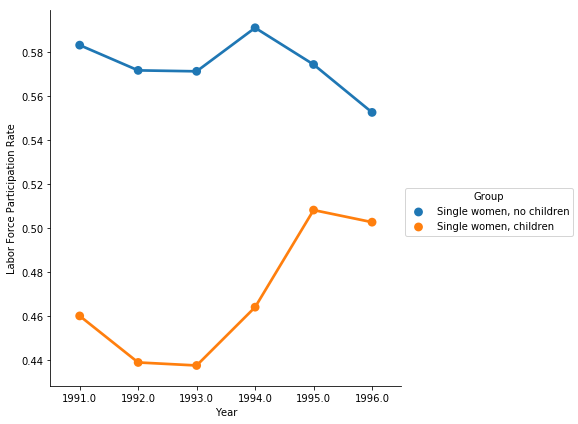

In [10]:
# slide 32
g = sns.factorplot(x = 'YR', y = 'LFPR', hue = 'Group', data = minfo, 
               size = 6, ci = None)
(g.set_axis_labels("Year", "Labor Force Participation Rate"))

In [11]:
means = eitc.groupby(['post93', 'anykids'], as_index = False).agg({'work': 'mean'})
means

,post93,anykids,work
0,0,0,0.575460
1,0,1,0.445962
2,1,0,0.573386
3,1,1,0.490761


In [12]:
# calculate differences in means by indexing
(means.iloc[3, 2] - means.iloc[2, 2]) - (means.iloc[1, 2] - means.iloc[0, 2])

0.04687313210185562

### In regression terms

In [15]:
# slide 36
reg1 = smf.ols('work ~ post93 + anykids + post93:anykids', data = eitc).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   work   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     58.45
Date:                Thu, 16 Aug 2018   Prob (F-statistic):           1.54e-37
Time:                        14:33:20   Log-Likelihood:                -9884.9
No. Observations:               13746   AIC:                         1.978e+04
Df Residuals:                   13742   BIC:                         1.981e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.5755      0.009     65.060      0.000       0.558       0.593
post93            -0.0021      0.013     -0.160      0.873      -0.027       0.023
anykids           -0.1295      0.012    -11.091      0.000      -0.152      -0.107
post93:anykids     0.0469      0.017      2.732      0.006       0.013       0.081
==============================================================================
Omnibus:                        5.965   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.051   Jarque-Bera (JB):             2175.929
Skew:                          -0.051   Prob(JB):                         0.00
Kurtosis:                       1.054   Cond. No.                         7.14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### With covariates

In [22]:
reg2 = smf.ols('work ~ anykids + post93 + post93:anykids + nonwhite + age + I(age**2) + ed + finc + I(finc-earn)', data=eitc).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   work   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     366.3
Date:                Thu, 16 Aug 2018   Prob (F-statistic):               0.00
Time:                        14:41:25   Log-Likelihood:                -8493.6
No. Observations:               13746   AIC:                         1.701e+04
Df Residuals:                   13736   BIC:                         1.708e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.3496      0.024     14.788      0.000       0.303       0.396
anykids           -0.0544      0.011     -4.972      0.000      -0.076      -0.033
post93            -0.0065      0.012     -0.560      0.576      -0.029       0.016
post93:anykids     0.0398      0.016      2.567      0.010       0.009       0.070
nonwhite          -0.0624      0.008     -7.811      0.000      -0.078      -0.047
age                0.0028      0.000      6.889      0.000       0.002       0.004
I(age ** 2)     5.634e-05   5.25e-05      1.073      0.283   -4.66e-05       0.000
ed                 0.0138      0.001      9.248      0.000       0.011       0.017
finc            8.892e-06   2.13e-07     41.657      0.000    8.47e-06    9.31e-06
I(finc - earn)  -2.67e-05   5.79e-07    -46.078      0.000   -2.78e-05   -2.56e-05
==============================================================================
Omnibus:                       49.267   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.665
Skew:                          -0.144   Prob(JB):                     1.64e-11
Kurtosis:                       2.941   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Placebo treatment

In [23]:
# slide 39
# subset the data to include only years before 1994
eitc_sub = eitc.where(eitc['year'] <= 1993)

# create a new "after treatment" dummy variable and interaction term
eitc_sub['post91'] = (eitc_sub['year'] >= 1992).astype(int)

# run a placeto regression where placebo treatment = post91*anykids
reg3 = smf.ols('work ~ anykids + post91 + post91*anykids', data = eitc_sub).fit()
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   work   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     41.89
Date:                Thu, 16 Aug 2018   Prob (F-statistic):           7.77e-27
Time:                        14:42:01   Log-Likelihood:                -5309.2
No. Observations:                7401   AIC:                         1.063e+04
Df Residuals:                    7397   BIC:                         1.065e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.5830      0.015     39.132      0.000       0.554       0.612
anykids           -0.1230      0.020     -6.262      0.000      -0.161      -0.084
post91            -0.0117      0.018     -0.631      0.528      -0.048       0.025
post91:anykids    -0.0101      0.024     -0.415      0.678      -0.058       0.038
==============================================================================
Omnibus:                        0.013   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.993   Jarque-Bera (JB):             1151.244
Skew:                          -0.003   Prob(JB):                    1.02e-250
Kurtosis:                       1.068   Cond. No.                         8.86
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The `sumstats` function

In [24]:
# slide 41-42
def sumstats(x):
    # the count() function skips NA's by default
    sumtable = x.count().to_frame()
    sumtable['mean'] = round(x.mean(numeric_only = True), 2)
    sumtable['median'] = round(x.median(numeric_only = True), 2)
    sumtable['sd'] = round(x.std(numeric_only = True), 2)
    sumtable['min'] = round(x.min(numeric_only = True), 2)
    sumtable['max'] = round(x.max(numeric_only = True), 2)
    sumtable.columns = ['obs', 'mean', 'median', 'sd', 'min', 'max']
    return sumtable

In [25]:
sumstats(eitc.where(eitc['children'] == 0))

,obs,mean,median,sd,min,max
state,5927,53.40,56.00,26.40,11.00,95.00
year,5927,1993.37,1993.00,1.70,1991.00,1996.00
urate,5927,6.66,6.70,1.48,2.60,11.40
children,5927,0.00,0.00,0.00,0.00,0.00
nonwhite,5927,0.52,1.00,0.50,0.00,1.00
finc,5927,18559.86,11912.96,23041.78,0.00,575616.82
earn,5927,13760.26,7664.01,21301.40,0.00,537880.61
age,5927,38.50,40.00,11.05,20.00,54.00
ed,5927,8.55,10.00,2.89,0.00,11.00
work,5927,0.57,1.00,0.49,0.00,1.00


## Example: Does living under an opposing-party President affect Republican happiness more than Democratic happiness?

In [2]:
# slide 50
gss = pd.read_csv("Data/trends-gss.csv")
variables = ['happy', 'partyid', 'year', 'age', 'educ', 'sex', 'realinc', 'polviews', 'race', 'region']
sub = gss[variables].copy()

sub['n_happy'] = sub['happy'].replace([1, 3], [3, 1])
sub['repub'] = np.where(pd.isnull(sub.partyid), np.nan, 
                       np.where(sub.partyid <= 2, 0, 
                               np.where((sub.partyid >=4) & (sub.partyid <= 6), 1, np.nan)))

In [36]:
sub.repub.value_counts()

0.0    27900
1.0    19474
Name: repub, dtype: int64

In [38]:
# slide 51

smf.ols('n_happy ~ C(year)*repub', data=sub[(sub.year==2006) | (sub.year==2010)]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                n_happy   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     17.52
Date:                Thu, 16 Aug 2018   Prob (F-statistic):           2.70e-11
Time:                        15:07:35   Log-Likelihood:                -3768.7
No. Observations:                3917   AIC:                             7545.
Df Residuals:                    3913   BIC:                             7570.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.1304      0.018    121.411      0.000       2.096       2.165
C(year)[T.2010]          -0.0386      0.027     -1.432      0.152      -0.091       0.014
repub                     0.1542      0.027      5.786      0.000       0.102       0.206
C(year)[T.2010]:repub    -0.0950      0.042     -2.278      0.023      -0.177      -0.013
==============================================================================
Omnibus:                      138.696   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.787
Skew:                          -0.156   Prob(JB):                     9.49e-17
Kurtosis:                       2.404   Cond. No.                         6.09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
# slide 54

smf.ols('n_happy ~ C(year) + repub + age + educ + sex + realinc + polviews + C(race) + C(region) + C(year):repub', 
       data = sub[(sub.year==2006) | (sub.year==2010)]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                n_happy   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     11.91
Date:                Thu, 16 Aug 2018   Prob (F-statistic):           2.16e-34
Time:                        15:08:57   Log-Likelihood:                -3190.3
No. Observations:                3431   AIC:                             6419.
Df Residuals:                    3412   BIC:                             6535.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.5233      0.098     15.566      0.000       1.331       1.715
C(year)[T.2010]          -0.0268      0.028     -0.956      0.339      -0.082       0.028
C(race)[T.2]             -0.0454      0.033     -1.395      0.163      -0.109       0.018
C(race)[T.3]              0.0261      0.038      0.680      0.496      -0.049       0.101
C(region)[T.2]            0.1664      0.063      2.647      0.008       0.043       0.290
C(region)[T.3]            0.0901      0.061      1.481      0.139      -0.029       0.209
C(region)[T.4]            0.1798      0.070      2.586      0.010       0.043       0.316
C(region)[T.5]            0.1266      0.060      2.096      0.036       0.008       0.245
C(region)[T.6]            0.1589      0.072      2.221      0.026       0.019       0.299
C(region)[T.7]            0.1568      0.065      2.408      0.016       0.029       0.284
C(region)[T.8]            0.0870      0.066      1.312      0.190      -0.043       0.217
C(region)[T.9]            0.1113      0.062      1.788      0.074      -0.011       0.233
repub                     0.0860      0.031      2.747      0.006       0.025       0.147
C(year)[T.2010]:repub    -0.0973      0.043     -2.249      0.025      -0.182      -0.012
age                       0.0001      0.001      0.232      0.816      -0.001       0.001
educ                      0.0180      0.004      4.728      0.000       0.011       0.026
sex                       0.0408      0.021      1.901      0.057      -0.001       0.083
realinc                3.161e-06    3.6e-07      8.791      0.000    2.46e-06    3.87e-06
polviews                  0.0194      0.008      2.329      0.020       0.003       0.036
==============================================================================
Omnibus:                       87.580   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.268
Skew:                          -0.091   Prob(JB):                     5.44e-11
Kurtosis:                       2.455   Cond. No.                     7.73e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.73e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

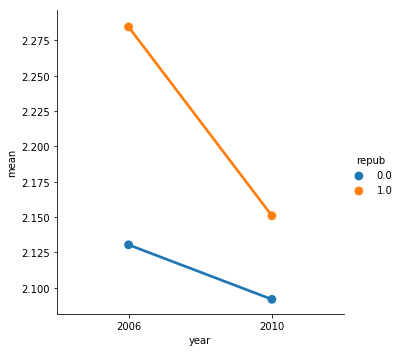

In [4]:
# slide 55

happy_by_year = sub.groupby(['year', 'repub'])['n_happy'].mean().to_frame(name='mean')
happy_by_year.dropna(inplace=True)
happy_by_year.reset_index(drop=False, inplace=True)
happy_by_year2 = happy_by_year[(happy_by_year.year==2006) | (happy_by_year.year==2010)]

sns.catplot(x = 'year', y = 'mean', hue = 'repub', kind='point', data=happy_by_year2) 

In [13]:
happy_by_year.head()

,year,repub,mean
0,1972,0.0,2.087051
1,1972,1.0,2.237363
2,1973,0.0,2.194030
3,1973,1.0,2.309129
4,1974,0.0,2.225728


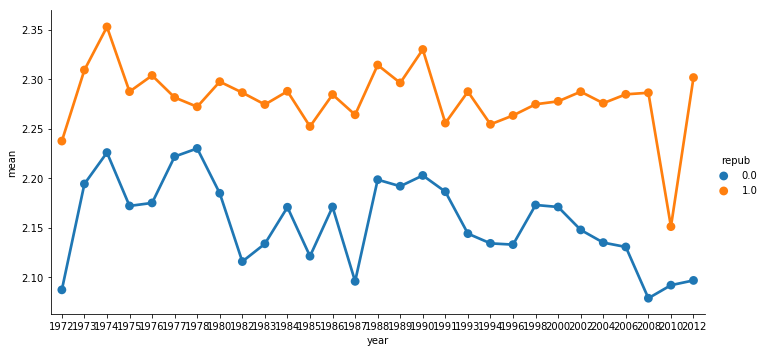

In [14]:
sns.catplot(x = 'year', y = 'mean', hue = 'repub', kind='point', data=happy_by_year, aspect=2) 

Text(0,0.5,'mean')

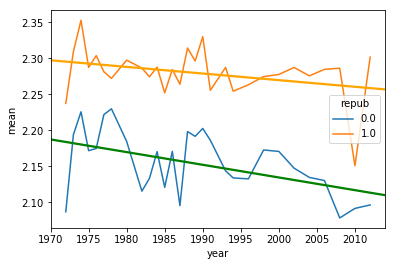

In [14]:
repub = sub[sub.repub==1]
non_repub = sub[sub.repub==0]

happy_by_year = sub.groupby(['year', 'repub'])['n_happy'].mean().unstack()

# plot trend lines
ax = happy_by_year.plot()

# plot regression lines
sns.regplot(x = 'year', y = 'n_happy', data = repub,
            scatter = False, ci = None, fit_reg = True, color='orange')
sns.regplot(x = 'year', y = 'n_happy', data = non_repub,
            scatter = False, ci = None, fit_reg = True, color='green')

ax.set_ylabel('mean')